In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [11]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data = pd.read_csv("./Resources/lending_data.csv")
# Review the DataFrame
lending_data

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [12]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = lending_data['loan_status'] # target

# Separate the X variable, the features
X=lending_data.drop(columns='loan_status') #Features

In [13]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [14]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [15]:
# Check the balance of our target values
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [16]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [17]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lm = LogisticRegression(random_state=1)

# Fit the model using training data
lm.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [18]:
# Make a prediction using the testing data
lm.score(X_test, y_test)

0.9918489475856377

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [20]:
# Print the balanced_accuracy score of the model
y_pred = lm.predict(X_test)
Balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced accuracy:", Balanced_accuracy)


Balanced accuracy: 0.9520479254722232


In [21]:
results = pd.DataFrame({
    'observed' : y_test,
    'estimated' : lm.predict(X_test)
})
results['compare'] = results['observed'] == results['estimated']
results.groupby(['estimated','observed']).count()

compare
estimated observed         
0         0           18663
          1              56
1         0             102
          1             563

<AxesSubplot:>

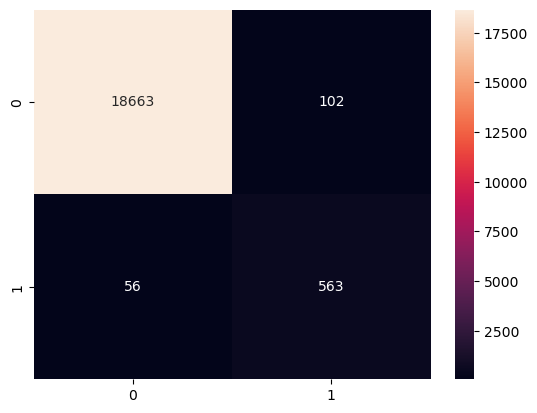

In [22]:
# Generate a confusion matrix for the model
# Print the classification report for the model
import seaborn as sns
cnf = confusion_matrix(y_test, lm.predict(X_test))
sns.heatmap(cnf, annot=True, fmt='.0f') # fmt='.0f' means 0 decimals.

In [23]:
# Print the classification report for the model
print(classification_report(y_test, lm.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** We can observate:
`Recall of healthy loan` $ recall_0 = 99% $,
`Recall high risk loan` $recall_1 = 91% $. 

All of this because of the size of the data: `0  ->  75036, 1  ->  2500`

the low quantity of `1` make it have more oportunity of errors `8%`

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [24]:
# pip install imbalanced-learn 
# just in case you do not have it install.


     -------------------------------------- 235.6/235.6 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 1.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [24]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [25]:
# Count the distinct values of the resampled labels data
print("Original class distribution:", y_train.sum(), "positive samples out of", len(y_train))
print("Resampled class distribution:", y_resampled.sum(), "positive samples out of", len(y_resampled))

Original class distribution: 1881 positive samples out of 58152
Resampled class distribution: 56271 positive samples out of 112542


In [26]:
[X_resampled,y_resampled]

[        loan_size  interest_rate  borrower_income  debt_to_income  \
 0          8600.0          6.792            44500        0.325843   
 1          7800.0          6.419            41000        0.268293   
 2         10000.0          7.386            50100        0.401198   
 3          9300.0          7.093            47300        0.365751   
 4          9200.0          7.045            46900        0.360341   
 ...           ...            ...              ...             ...   
 112537    17500.0         10.577            80100        0.625468   
 112538    20000.0         11.611            89900        0.666296   
 112539    19200.0         11.266            86600        0.653580   
 112540    19100.0         11.245            86400        0.652778   
 112541    20700.0         11.913            92700        0.676375   
 
         num_of_accounts  derogatory_marks  total_debt  
 0                     3                 0       14500  
 1                     2                 0  

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [28]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lm2 = LogisticRegression(random_state=1)
# Fit the model using the resampled training data
lm2.fit(X_resampled,y_resampled)
# Make a prediction using the testing data
lm2.score(X_test,y_test)

0.9938093272802311

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [29]:
# Print the balanced_accuracy score of the model 
y_pred = lm2.predict(X_test)
Balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced accuracy:", Balanced_accuracy)

Balanced accuracy: 0.9936781215845847


In [32]:
# Generate a confusion matrix for the model
cnf = confusion_matrix(y_resampled, lm2.predict(X_resampled))
cnf

array([[55964,   307],
       [  286, 55985]], dtype=int64)

In [31]:
# Print the classification report for the model
print(classification_report(y_resampled, lm2.predict(X_resampled)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56271
           1       0.99      0.99      0.99     56271

    accuracy                           0.99    112542
   macro avg       0.99      0.99      0.99    112542
weighted avg       0.99      0.99      0.99    112542



<AxesSubplot:>

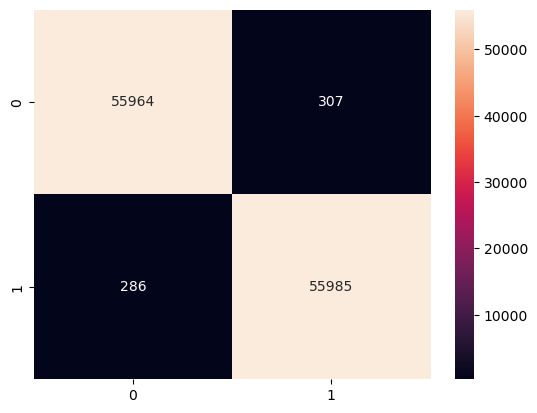

In [33]:
sns.heatmap(cnf, annot=True, fmt='.0f')

### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** We can see a really big difference: in the previews process we obtain this information: 
`Recall of healthy loan` $ recall_0 = 99% $,
`Recall high risk loan` $recall_1 = 91% $. 

And now in this new step we have more acurate information.
`Recall of healthy loan` $ recall_0 = 99% $,
`Recall high risk loan` $recall_1 = 99% $. 

And it is because now we have "112541" saples of `0` and `1`, helping it to be more precize at the time of preddicting the information.